# Uber Ridesharing Data Wrangling 

#### Developer: Ngoc Khue Anh Van
#### Email: ngockhueanhvan@gmail.com

Date: 05/05/2019

Version: 1.0

Environment: Python 3.7.0 and Jupyter notebook

#### Libraries used:
* pandas: work with dataframe
* datetime: convert and opperand on date & time values
* matplotlib: plot charts for graphic EDA
* seaborn: plot chart for grapphic EDA
* numpy: work with dataframe and series
* folium: plot map
* networkx: find the travel paths & shortest distance
* math: round up numeric values
* Linear Regression: build models

#### Introduction:
- The dataset is about Uber Ridesharing data in Victoria, Australia. 
- In each row, we have 'ID' of the journey, 'Uber Type', 'Origin Region', 'Destination Region', 'Destination Latitude', 'Destination Longitude', 'Journey distance', 'Departure Date', 'Departure Time', 'Travel Time', 'Arrival Time', 'Fare$'
- There are three main task in this project
        * (1) Cleansing the dirty data
        * (2) Impute the missing values
        * (3) Detect outliers and remove


In [1]:
import pandas as pd
from datetime import datetime
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import folium
import networkx as nx
import math

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
pd.set_option('mode.chained_assignment', None)

In [4]:
# import each dataset into Jupiter Notebook
edges = pd.read_csv('edges.csv')
nodes = pd.read_csv('nodes.csv')
dirty = pd.read_csv('29915910_dirty_data.csv')
missing = pd.read_csv('29915910_missing_value.csv')
outlier = pd.read_csv('29915910_outliers.csv')

## 1. Dirty dataset

- In regards to this dataset, students are asked to detect and fix errors in the given dirty dataset.
- Both graphical and non-graphical EDA methods to understand the data first and then find the data problems.
- The dataset is about Uber Ridesharing data in Victoria, Australia

In [5]:
# Print the first few lines of the dataset to get to know the structure
dirty.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID1983358249,0,6,4,-37.773845,144.983689,-37.809481,145.010027,7393.8,2018-03-04,23:56:11,1651.20,0:23:42,16.50
1,ID5292481643,2,3,5,-37.817374,144.970386,-37.802547,144.935026,4136.4,2018-06-10,02:52:41,1114.44,3:11:15,111.34
2,ID3451399222,1,4,6,-37.816259,145.014731,-37.773803,144.983647,11707.2,2018-07-05,16:16:21,3497.16,17:14:38,25.66
3,ID5735936789,2,5,4,-37.814860,144.923513,-37.812069,144.995689,7640.0,2018-07-17,21:54:03,2019.90,22:27:42,165.86
4,ID1962371446,0,1,4,-37.825166,144.953917,-37.813251,145.000152,5391.0,2018-06-22,17:02:08,1359.36,17:24:47,8.26


In [6]:
# Make a copy of dirty data to keep the original dataframe intacted. We are going to execute our fixes on the coppied dataframe
main = dirty.copy()

# a column to check the eror of detected row
main['Detected Error'] = np.nan

### 1.1 Uber Type
- A categorical attribute for the type of the journey namely Uber pool, Uberx, Uber black. 
- We know that the cost of these types of journeys may be different.

In [7]:
# slicing
dfUber = main.copy()

In [8]:
# check the unique types of Uber
dfUber['Uber Type'].unique()

array([0, 2, 1, 3], dtype=int64)

- There are only three types but 4 unique numbers. There must be a problem here. Let's examine the dataset to find out some hints.
- At a glance at the dataset, we can see there is relationship between the route ID and Uber Type

In [9]:
dfUber.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Detected Error
0,ID1983358249,0,6,4,-37.773845,144.983689,-37.809481,145.010027,7393.8,2018-03-04,23:56:11,1651.20,0:23:42,16.50,NaN
1,ID5292481643,2,3,5,-37.817374,144.970386,-37.802547,144.935026,4136.4,2018-06-10,02:52:41,1114.44,3:11:15,111.34,NaN
2,ID3451399222,1,4,6,-37.816259,145.014731,-37.773803,144.983647,11707.2,2018-07-05,16:16:21,3497.16,17:14:38,25.66,NaN
3,ID5735936789,2,5,4,-37.814860,144.923513,-37.812069,144.995689,7640.0,2018-07-17,21:54:03,2019.90,22:27:42,165.86,NaN
4,ID1962371446,0,1,4,-37.825166,144.953917,-37.813251,145.000152,5391.0,2018-06-22,17:02:08,1359.36,17:24:47,8.26,NaN


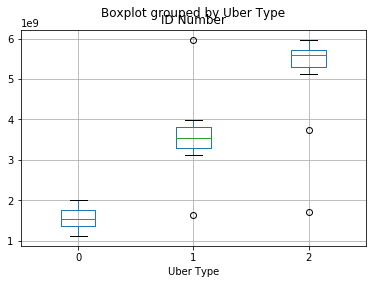

In [10]:
# create a column name 'ID Number' to get only the numeric characters
dfUber['ID Number'] = np.nan

# extract the numbers
for i in range(len(dfUber.index)):
    dfUber['ID Number'][i] = int(dfUber['Unnamed: 0'][i].replace('ID', ''))
    
# boxplot to see the distribution by Uber Type
dfUber[dfUber['Uber Type'] != 3].boxplot(column = 'ID Number', by = 'Uber Type')

We can see that, apart from Uber Type 3
- Uber Type 0 has ID Number starting with '1'
- Uber Type 1 has ID Number starting with '3'
- Uber Type 2 has ID Number staring with '5'

All the outliers and Uber Type 3 are errors and needed to be fixed

In [11]:
# the error of Uber Type 1
filterUber1 = (dfUber['Uber Type'] == 1) & ((3000000000>dfUber['ID Number'])|(dfUber['ID Number']>4000000000))

# the error of Uber Type 2
filterUber2 = (dfUber['Uber Type'] == 2) & ((5000000000>dfUber['ID Number'])|(dfUber['ID Number']>6000000000))

# the error of Uber Type 3
filterUber3 = (dfUber['Uber Type'] == 3)

In [12]:
# Uber Type 1 errors
errorUber1 = dfUber[filterUber1]
errorUber1

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Detected Error,ID Number
145,ID1642338048,1,4,7,-37.810555,145.000664,-37.861835,144.905716,11101.0,2018-06-16,13:12:44,3595.20,14:12:39,13.94,NaN,1.642338e+09
158,ID5977024665,1,2,4,-37.823145,144.939296,-37.811270,145.001947,6293.0,2018-07-19,15:17:10,1633.44,15:44:23,130.05,NaN,5.977025e+09


In [13]:
# Uber Type 2 errors
errorUber2 = dfUber[filterUber2]
errorUber2

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Detected Error,ID Number
147,ID1707088992,2,1,9,-37.805779,144.963848,-38.110916,144.654173,44164.0,2018-03-01,08:42:27,10672.14,11:40:19,15.16,NaN,1.707089e+09
157,ID3745222196,2,4,6,-37.807854,145.008600,-37.773803,144.983647,10300.0,2018-01-27,04:33:37,3080.58,5:24:57,33.50,NaN,3.745222e+09


In [14]:
# Uber Type 3 errors
errorUber3 = dfUber[filterUber3]
errorUber3

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Detected Error,ID Number
136,ID3330724213,3,8,4,-37.815834,145.046450,-37.799136,145.010615,5051.0,2018-07-04,12:40:44,1568.76,13:06:52,18.33,NaN,3.330724e+09
152,ID3828040122,3,3,9,-37.812304,144.973643,-38.110916,144.654173,44367.0,2018-07-07,04:23:53,10691.64,7:22:04,66.53,NaN,3.828040e+09
163,ID5130319492,3,8,6,-37.815834,145.046450,-37.787442,144.980409,8357.0,2018-02-07,14:45:15,2437.38,15:25:52,184.38,NaN,5.130319e+09
166,ID3684453854,3,3,2,-37.819338,144.983695,-37.815114,144.944980,4057.0,2018-07-08,20:27:10,969.48,20:43:19,19.60,NaN,3.684454e+09


In [15]:
# fix the errors in main dataframe
main['Uber Type'][145] = 0
main['Uber Type'][158] = 2

main['Uber Type'][147] = 0
main['Uber Type'][157] = 1

main['Uber Type'][136] = 1
main['Uber Type'][152] = 1
main['Uber Type'][163] = 2
main['Uber Type'][166] = 1

# add info to the detected error columns
errorUber = [145, 158, 147, 157, 136, 152, 163, 166]
for i in errorUber:
    main['Detected Error'][i] = 'Uber Type'

### 1.2 Departure Date

#### a. Departure Date
- For departure date, we need to check whether the dates are in proper format
- Let's try to convert these string values into datetime format
- If a data value is unable to be converted, it is dirty data

In [16]:
import datetime

# function to check date format
def checkDate(date_string):
    correctDate = None
    try:
        newDate =  pd.to_datetime(date_string, format='%Y-%m-%d').date
        correctDate = True
    except ValueError:
        correctDate = False
    return correctDate

In [17]:
errorDate = []

# put each value to the checkDate function
for i in range(len(main.index)):
    target = checkDate(main['Departure Date'][i])
    if target == False:
        errorDate.append(i)
print(errorDate)

[220, 222, 226, 227, 229, 237, 240, 241, 244, 246, 250, 251, 253, 256, 260]


In [18]:
# print out the dirty datas to have a look
tuple_e = ()
for i in errorDate:
    tuple_e = (i, dirty['Departure Date'][i])
    print(tuple_e)

(220, '2018-16-06')
(222, '2018-25-04')
(226, '2018-27-01')
(227, '2018-18-03')
(229, '2018-17-06')
(237, '2018-04-31')
(240, '2018-04-31')
(241, '2018-04-31')
(244, '2018-06-31')
(246, '2018-04-31')
(250, '2018-04-31')
(251, '2018-06-31')
(253, '2018-02-30')
(256, '2018-06-31')
(260, '2018-04-31')


We can see that there are 15 data points in 'Departure Date' which have ValueError. The errors were raised because the dates are either not in right format or invalid, such as 2018-04-31 (there is no such day!)
* For those with wrong format, we will transform the format
* For those with invalid dates, we will shift them to the nearest date values

In [19]:
# update the clean file with formatted datas
main['Departure Date'][220] = '2018-06-16'
main['Departure Date'][222] = '2018-04-25'
main['Departure Date'][226] = '2018-01-27'
main['Departure Date'][227] = '2018-03-18'
main['Departure Date'][229] = '2018-06-17'
main['Departure Date'][237] = '2018-04-30'
main['Departure Date'][240] = '2018-04-30'
main['Departure Date'][241] = '2018-04-30'
main['Departure Date'][244] = '2018-06-30'
main['Departure Date'][246] = '2018-04-30'
main['Departure Date'][250] = '2018-04-30'
main['Departure Date'][251] = '2018-06-30'
main['Departure Date'][253] = '2018-02-28'
main['Departure Date'][256] = '2018-06-30'
main['Departure Date'][260] = '2018-04-30'

In [20]:
for i in errorDate:
    target = main['Detected Error'][i]
    if np.isnan(target):
        main['Detected Error'][i] = 'Departure Date'
    else:
        main['Detected Error'][i] = 'Check again!'

So far, we have discovered 15 dirty data points. Given that each line only contains one dirty data, we should create a list to store the scanned rows

### 1.3 Latitude and longitude
In this section, we are going to examine and fix the errors of those columns related to the location, including:
* Origin Latitude
* Destination Latitude
* Origin Longitude
* Destination Longitude

#### a. Detect errors of dirty dataset
- Presumption is that it does not make sense to take an Uber to travel overseas. The dataset is about Uber Ridesharing in Victoria, thus the latitude and longitude values should be within the given region.
- Victoria (in fact the whole Australia) is located in the southern hemisphere, thus the latitude values should be negative numbers

Text(0,0.5,'Latitude')

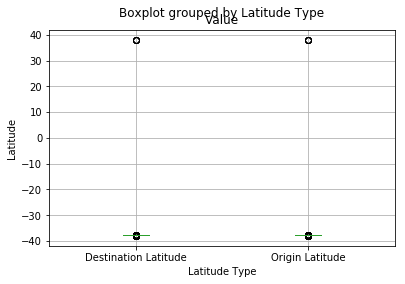

In [21]:
# Box plot to see the distribution of latitudes
melt_dirty = pd.melt(main[['Unnamed: 0', 'Origin Latitude', 'Destination Latitude']], id_vars=['Unnamed: 0'])
melt_dirty.columns = ['Unnamed: 0','Latitude Type', 'Value']
melt_dirty.boxplot(column='Value', by = 'Latitude Type')
plt.ylabel("Latitude")

Here, according to the boxplot, we can see that there are some data points that have positive latitude values. Those points must have been mistaken and should be corrected to nagative figures

#### b. Fix errors
We are going to fix the detected errors on the coppied version (clean)

In [22]:
# Substitute origin latitude with negative values
main['Origin Latitude'][main['Origin Latitude']>0] = -dirty['Origin Latitude'][dirty['Origin Latitude']>0]

In [23]:
# Substitute destination latitude with negative values
main['Destination Latitude'][main['Destination Latitude']>0] = -dirty['Destination Latitude'][dirty['Destination Latitude']>0]

In [24]:
print(dirty['Destination Latitude'][dirty['Destination Latitude']>0].index)
print(dirty['Origin Latitude'][dirty['Origin Latitude']>0].index)

Int64Index([60, 63, 74, 75, 82], dtype='int64')
Int64Index([41, 44, 47, 52, 54], dtype='int64')


Add our findings to the discovered list

In [25]:
errorDlat = [60, 63, 74, 75, 82] 
errorOlat = [41, 44, 47, 52, 54]

for i in errorDlat:
    target = main['Detected Error'][i]
    if np.isnan(target):
        main['Detected Error'][i] = 'Destination Latitude'
    else:
        main['Detected Error'][i] = 'Check again!'
        
for i in errorOlat:
    target = main['Detected Error'][i]
    if np.isnan(target):
        main['Detected Error'][i] = 'Origin Latitude'
    else:
        main['Detected Error'][i] = 'Check again!'

### 1.4 Region
In this section, we are going to plot the cleaned origin/destination locations by latitudes and longitudes on map to check whether 'Origin Region' and 'Destination Region' are correct
- Each color preresents one region
- In case a marker is located inside a region of different colors, it is wrong and needs to be corrected

In [26]:
# color codes corresponding for each region input
def color(region):
    colors = ['red','lightgreen','yellow','orange','darkred','white','purple','salmon','lightblue','darkblue']
    return colors[region]

# popup the region name as click on the map points
def popup(region):
    name = ['Region:0','Region:1','Region:2', 'Region:3','Region:4','Region:5','Region:6', 'Region:7', 'Region:8','Region:9']
    return name[region]

First, let's check the Oringin Region

In [27]:
o_base_map = folium.Map(location=[main['Origin Latitude'].mean(),main['Origin Longitude'].mean()], zoom_start=10,tiles = 'CartoDB dark_matter')
for lat,lan,region in zip(main['Origin Latitude'],main['Origin Longitude'], main['Origin Region']): 
    folium.CircleMarker(location=[lat,lan], popup=('Origin:\n'+popup(region)+'\n'+'Latitude: '+str(lat)+"\n"+"Longitude: "+str(lan)), radius=3,color=color(region),fill=False).add_to(o_base_map)

In [28]:
o_base_map

In [29]:
d_base_map = folium.Map(location=[main['Destination Latitude'].mean(),main['Destination Longitude'].mean()], zoom_start=10,tiles = 'CartoDB dark_matter')
for lat,lan,region in zip(main['Destination Latitude'],main['Destination Longitude'], main['Destination Region']): 
    folium.CircleMarker(location=[lat,lan], popup=('Destination:\n'+popup(region)+'\n'+'Latitude: '+str(lat)+"\n"+"Longitude: "+str(lan)), radius=3,color=color(region),fill=False).add_to(d_base_map)

In [30]:
d_base_map

From the map and futher investigation from Tableu, we are able to detect the dirt datas as below

In [31]:
idOrigin = ['ID3482192211','ID3656916400','ID1956206697','ID3652165629','ID3606990952']
reOrigin = [7, 8, 8, 1, 1]

errorOrigin = []
for i in range(len(idOrigin)):
    main['Origin Region'][main['Unnamed: 0']==idOrigin[i]] = reOrigin[i]
    target = main['Origin Region'][main['Unnamed: 0']==idOrigin[i]]
    errorOrigin.append(target.index.tolist())

idDes = ['ID1692995260', 'ID1309010372', 'ID5688874760', 'ID1134348727', 'ID3604384588']
reDes = [1, 3, 7, 6, 9]

errorDes = []
for j in range(len(idDes)):
    main['Destination Region'][main['Unnamed: 0']==idDes[j]] = reDes[j]
    target = main['Destination Region'][main['Unnamed: 0']==idDes[j]]
    errorDes.append(target.index.tolist())
    
# main[main['Unnamed: 0']=='ID3482192211']['Origin Region'] = 7

In [32]:
print(errorOrigin)
print(errorDes)

[[21], [26], [19], [23], [22]]
[[29], [31], [33], [34], [35]]


In [33]:
errorOrigin = [21, 26, 19, 23, 22] 
errorDes = [29, 31, 33, 34, 35]

for i in errorOrigin:
    target = main['Detected Error'][i]
    if np.isnan(target):
        main['Detected Error'][i] = 'Origin Region'
    else:
        main['Detected Error'][i] = 'Check again!'
        
for i in errorDes:
    target = main['Detected Error'][i]
    if np.isnan(target):
        main['Detected Error'][i] = 'Destination Region'
    else:
        main['Detected Error'][i] = 'Check again!'

In [34]:
# all_base_map = folium.Map(location=[clean['Destination Latitude'].mean(),clean['Destination Longitude'].mean()], zoom_start=10,tiles = 'CartoDB dark_matter')
# for lat,lan,region in zip(clean['Destination Latitude'],clean['Destination Longitude'], clean['Destination Region']): 
#     folium.CircleMarker(location=[lat,lan], popup=('Destination:\n'+popup(region)+'\n'+'Latitude: '+str(lat)+"\n"+"Longitude: "+str(lan)), radius=3,color=color(region),fill=False).add_to(all_base_map)
# for lat,lan,region in zip(clean['Origin Latitude'],clean['Origin Longitude'], clean['Origin Region']): 
#     folium.CircleMarker(location=[lat,lan], popup=('Origin:\n'+popup(region)+'\n'+'Latitude: '+str(lat)+"\n"+"Longitude: "+str(lan)), radius=3,color=color(region),fill=False).add_to(all_base_map)
# all_base_map

### 1.5 Journey distance & travel time
- This figure is identified by calculating the shortest distance and travel time using Djisktra algorithm
#### a. Journey distance

- First we merge the info from the three files, clean and nodes and edges to find the node id of departure location and destination location

In [35]:
nodesOrigin = pd.merge(main, nodes, how='left', left_on = ['Origin Latitude','Origin Longitude'], right_on = ['lat','lon'])

In [36]:
nodesOrigin['Unnamed: 0_y'].isnull().values.any() # check if there is any null value

False

In [37]:
# reformat
nodesOrigin.rename(columns = {'Unnamed: 0_y':'Origin Node'}, inplace = True)
nodesOrigin.drop(['lat','lon'], axis=1, inplace=True)
nodesOrigin.head(1)

,Unnamed: 0_x,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Detected Error,Origin Node
0,ID1983358249,0,6,4,-37.773845,144.983689,-37.809481,145.010027,7393.8,2018-03-04,23:56:11,1651.2,0:23:42,16.5,NaN,2455254499


In [38]:
# continue to add the Destination node id
nodesAll = pd.merge(nodesOrigin, nodes, how='left', left_on=['Destination Latitude','Destination Longitude'], right_on = ['lat','lon'] )

In [39]:
nodesAll['Unnamed: 0'].isnull().values.any() # check if we have any null value

False

In [40]:
nodesAll.rename(columns = {'Unnamed: 0_x':'Unnamed: 0','Unnamed: 0':'Destination Node'}, inplace = True)
nodesAll.drop(['lat','lon'], axis=1, inplace=True)
nodesAll.head(1)

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Detected Error,Origin Node,Destination Node
0,ID1983358249,0,6,4,-37.773845,144.983689,-37.809481,145.010027,7393.8,2018-03-04,23:56:11,1651.2,0:23:42,16.5,NaN,2455254499,299024283


* Next, we are going to draw the graph from the nodes from edges file

In [41]:
# Graph
G = nx.from_pandas_edgelist(edges, 'u', 'v', ['distance(m)'])

In [42]:
# Using Djisktra algorithm, we write the shortest distance function
def shortestDistance(src, des):
    distance = nx.shortest_path_length(G, source=src, target=des, weight='distance(m)')
    return distance

In [43]:
# apply the function to find shortest distance for each row
errorDis = []
for i in range(len(nodesAll.index)):
    distance = shortestDistance(nodesAll['Origin Node'][i],nodesAll['Destination Node'][i])
    if distance != nodesAll['Journey Distance(m)'][i]:
        errorDis.append(i)
        main['Journey Distance(m)'][i] = distance # apply to clean dataset

In [44]:
errorDis

[0, 1, 2, 4, 8]

In [45]:
for i in errorDis:
    target = main['Detected Error'][i]
    if np.isnan(target):
        main['Detected Error'][i] = 'Journey Distance(m)'
    else:
        main['Detected Error'][i] = 'Check again!'

#### b. Departure & arrival time
* Because for each record, we have multiple paths and multiple valid travel times, we need to also look at departure and arrival time to identify which is the exact travel time value
* For each row, we check whether the arrival time is equal to departure time plus travel time
* For those rows that there are mismatches, we revert to a error list

In [55]:
dfTravelTime = main.copy()

In [56]:
# function to convert into time format
def convert_str_time(time_string):
    time_date = pd.to_datetime(time_string, format='%H:%M:%S')
    return time_date

In [57]:
# convert datetime data type in the sliced dataset
for i in range(len(dfTravelTime.index)):
    dfTravelTime['Departure Time'][i] = convert_str_time(main['Departure Time'][i])
    dfTravelTime['Arrival Time'][i] = convert_str_time(main['Arrival Time'][i])

In [61]:
# check the equal property
from datetime import datetime, timedelta
errorDAtime = []
for i in range(len(dfTravelTime.index)):
    check_at = (dfTravelTime['Departure Time'][i] + timedelta(seconds = dfTravelTime['Travel Time(s)'][i])).time()
    at_str = check_at.strftime("%H:%M:%S")
    at_date = convert_str_time(at_str)
    if at_date != dfTravelTime['Arrival Time'][i]:
        errorDAtime.append(i)
print(errorDAtime)

[88, 89, 91, 98, 100, 101, 103, 108, 110, 113, 115, 116, 117, 121, 122, 129, 130, 132, 134, 135, 175, 177, 180, 182, 185, 189, 193, 195, 200, 207]


In [62]:
# print the details
for i in errorDAtime:
    dt = dfTravelTime['Departure Time'][i].time()
    at = dfTravelTime['Arrival Time'][i].time()
    tt = dfTravelTime['Travel Time(s)'][i]
    print(i, dt, at, tt)

88 05:26:53 05:48:05 1365.4800000000002
89 17:24:31 18:10:06 2804.16
91 17:16:39 17:33:06 1052.0
98 00:18:46 00:45:08 1632.3200000000004
100 16:42:13 17:40:54 3541.7599999999993
101 00:56:29 03:56:15 10795.32
103 06:13:20 06:33:26 1178.2400000000011
108 02:57:15 03:17:40 1319.56
110 07:01:46 07:10:37 617.7799999999999
113 23:11:58 23:49:47 2288.4999999999995
115 07:26:47 07:49:17 12681.060000000005
116 17:06:20 23:01:00 1413.7200000000007
117 02:32:59 02:41:10 2188.92
121 05:41:01 08:00:06 931.86
122 00:38:27 02:30:28 607.98
129 15:52:23 22:30:50 1547.9400000000005
130 00:13:37 03:28:20 3749.159999999997
132 00:23:06 05:55:02 3096.54
134 20:29:51 02:01:07 2122.620000000001
135 09:31:44 12:26:37 3573.779999999999
175 23:14:08 23:04:54 554.5200000000002
177 19:11:23 18:48:32 1371.96
180 15:32:08 15:03:38 1710.3000000000013
182 17:13:24 16:10:06 3798.4799999999977
185 10:36:48 10:10:39 1569.3
189 00:19:27 23:15:25 3842.76
193 16:04:50 15:44:28 1222.2
195 22:36:04 21:35:47 3617.28000000000

* There are 30 errors in the list.  For the last 10 rows, the departure & arrival time were swapped

In [63]:
# for those are swapped, we put them in a list
swap_list = [175, 177, 180, 182, 185, 189, 193, 195, 200, 207]

# replace the correct figures for clean dataset
for i in swap_list:
    at = main['Departure Time'][i]
    dt = main['Arrival Time'][i]
    main['Departure Time'][i] = dt
    main['Arrival Time'][i] = at

In [64]:
# Update
for i in swap_list:
    target = main['Detected Error'][i]
    if np.isnan(target):
        main['Detected Error'][i] = 'Swapped D/A Time'
    else:
        main['Detected Error'][i] = 'Check again!'

The other 20 data points we need to check the travel time to see the root cause of errors

#### c. Travel time
* For each shortest distance, we are able to have multiple paths to travel from origin to arrival locations
* We are going to find all paths for each shortest distance and calculate the travel time

In [65]:
check_list = [88, 89, 91, 98, 100, 101, 103, 108, 110, 113, 115, 116, 117, 121, 122, 129, 130, 132, 134, 135]

In [66]:
# function for paths
def travelPath(src, des):
    paths = nx.all_shortest_paths(G,source=src, target=des, weight='distance(m)')
    p_list = list(paths)
    return p_list

In [67]:
# function for travel time
def traveltime(path, edges):
    tt = 0
    for i in range(len(path)-1):
        tt = tt + (edges[((edges.u==path[i]) & (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['distance(m)'].values[0] * 1.0 * 3600) / (edges[((edges.u==path[i]) & (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['speed(km/h)'].values[0] * 1000)
    return tt

In [68]:
# we find all the paths for each record and store in a list
all_route_list = []
for i in check_list:
    src = nodesAll['Origin Node'][i]
    des = nodesAll['Destination Node'][i]
    p_list = travelPath(src, des)
    all_route_list.append(p_list)

In [69]:
# we find all the travel times corresponding to each path and store in a list
all_time_list = []
for each_route in all_route_list:
    time_list = []
    for option in each_route:
        time = traveltime(option, edges)
        time_list.append(time)
    all_time_list.append(time_list)

In [70]:
# compare the original data with the computed travel times, if the data is in the list, then it is correct
errorTime = []
for i in range(len(check_list)):
    dirtyTime = nodesAll['Travel Time(s)'][check_list[i]]
    true_list = all_time_list[i]
    delta = []
    for each in true_list:
        delta.append(round(dirtyTime - each))
    if 0 not in delta:
        errorTime.append(check_list[i])

In [71]:
errorTime

[88, 89, 91, 98, 100, 101, 103, 108, 110, 113]

In [72]:
# find the true values by substracting
tt_list = []
for i in errorTime:
    travel_time = (dfTravelTime['Arrival Time'][i] - dfTravelTime['Departure Time'][i]).total_seconds()
    tt_list.append(travel_time)
tt_list

[1272.0, 2735.0, 987.0, 1582.0, 3521.0, 10786.0, 1206.0, 1225.0, 531.0, 2269.0]

In [73]:
for i in range(len(errorTime)):
    main['Travel Time(s)'][errorTime[i]] = tt_list[i]

In [74]:
for i in errorTime:
    target = main['Detected Error'][i]
    if np.isnan(target):
        main['Detected Error'][i] = 'Travel Time(s)'
    else:
        main['Detected Error'][i] = 'Check again!'
        
main['Detected Error'].value_counts()

Departure Date          15
Swapped D/A Time        10
Travel Time(s)          10
Uber Type                8
Origin Latitude          5
Origin Region            5
Journey Distance(m)      5
Destination Region       5
Destination Latitude     5
Name: Detected Error, dtype: int64

#### d. Others time errors

In [75]:
fix_at = [115, 116, 117, 121, 122, 129, 130, 132, 134, 135]
for i in fix_at:
    at = (dfTravelTime['Departure Time'][i] + timedelta(seconds = dfTravelTime['Travel Time(s)'][i])).time()
    at = at.strftime("%H:%M:%S")
    main['Arrival Time'][i] = at

In [76]:
for i in fix_at:
    target = main['Detected Error'][i]
    if np.isnan(target):
        main['Detected Error'][i] = 'Arrival Time'
    else:
        main['Detected Error'][i] = 'Check again!'
        
main['Detected Error'].value_counts()

Departure Date          15
Swapped D/A Time        10
Travel Time(s)          10
Arrival Time            10
Uber Type                8
Origin Latitude          5
Origin Region            5
Journey Distance(m)      5
Destination Region       5
Destination Latitude     5
Name: Detected Error, dtype: int64

After finishing all the cleasing steps, we are able to detect and fix:
* Departure Date          15
* Swapped D/A Time        10
* Travel Time(s)          10
* Arrival Time            10
* Uber Type                8
* Origin Latitude          5
* Origin Region            5
* Journey Distance(m)      5
* Destination Region       5
* Destination Latitude     5

In [77]:
main.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Detected Error
0,ID1983358249,0,6,4,-37.773845,144.983689,-37.809481,145.010027,7388.0,2018-03-04,23:56:11,1651.20,0:23:42,16.50,Journey Distance(m)
1,ID5292481643,2,3,5,-37.817374,144.970386,-37.802547,144.935026,4133.0,2018-06-10,02:52:41,1114.44,3:11:15,111.34,Journey Distance(m)
2,ID3451399222,1,4,6,-37.816259,145.014731,-37.773803,144.983647,11705.0,2018-07-05,16:16:21,3497.16,17:14:38,25.66,Journey Distance(m)
3,ID5735936789,2,5,4,-37.814860,144.923513,-37.812069,144.995689,7640.0,2018-07-17,21:54:03,2019.90,22:27:42,165.86,NaN
4,ID1962371446,0,1,4,-37.825166,144.953917,-37.813251,145.000152,5382.0,2018-06-22,17:02:08,1359.36,17:24:47,8.26,Journey Distance(m)


In [79]:
outputDirty = main.drop('Detected Error', axis=1)
outputDirty.rename(columns={'Unnamed: 0':''},inplace=True)
outputDirty.to_csv('29915910_dirty_data_solution.csv',index=False)
outputDirty.head()

,,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID1983358249,0,6,4,-37.773845,144.983689,-37.809481,145.010027,7388.0,2018-03-04,23:56:11,1651.20,0:23:42,16.50
1,ID5292481643,2,3,5,-37.817374,144.970386,-37.802547,144.935026,4133.0,2018-06-10,02:52:41,1114.44,3:11:15,111.34
2,ID3451399222,1,4,6,-37.816259,145.014731,-37.773803,144.983647,11705.0,2018-07-05,16:16:21,3497.16,17:14:38,25.66
3,ID5735936789,2,5,4,-37.814860,144.923513,-37.812069,144.995689,7640.0,2018-07-17,21:54:03,2019.90,22:27:42,165.86
4,ID1962371446,0,1,4,-37.825166,144.953917,-37.813251,145.000152,5382.0,2018-06-22,17:02:08,1359.36,17:24:47,8.26


### 2. Missing data
- In this dataset, we have two types of missing values
    * Uber Type: Some of records are without Uber types
    * Fare$: Some of records are without Fares
- Our task here is to impute the missing values

In [80]:
# have a brief look to the missing dataset
missing = pd.read_csv('29915910_missing_value.csv')
missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 14 columns):
Unnamed: 0               80 non-null object
Uber Type                58 non-null float64
Origin Region            80 non-null int64
Destination Region       80 non-null int64
Origin Latitude          80 non-null float64
Origin Longitude         80 non-null float64
Destination Latitude     80 non-null float64
Destination Longitude    80 non-null float64
Journey Distance(m)      80 non-null float64
Departure Date           80 non-null object
Departure Time           80 non-null object
Travel Time(s)           80 non-null float64
Arrival Time             80 non-null object
Fare$                    60 non-null float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.8+ KB


We can see that here we have 22 missing values for Uber type and 20 missing values for Fares$

In [81]:
# some key statistics
missing.describe()

,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Travel Time(s),Fare$
count,58.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,60.000000
mean,0.586207,5.687500,5.112500,-37.875558,144.908085,-37.844332,144.946541,19857.025000,5130.849000,60.684500
std,0.676277,2.684195,2.681364,0.120128,0.134187,0.091124,0.106280,18088.134528,4322.259708,148.614322
min,0.000000,1.000000,1.000000,-38.110916,144.654173,-38.110916,144.654173,916.000000,223.800000,4.940000
25%,0.000000,3.000000,3.000000,-37.861835,144.905716,-37.819695,144.935334,6114.500000,1713.060000,15.227500
50%,0.000000,6.000000,5.000000,-37.815834,144.943743,-37.814304,144.973674,11159.000000,3318.390000,19.585000
75%,1.000000,8.000000,8.000000,-37.811216,144.988159,-37.807551,145.006408,44032.250000,10611.600000,30.790000
max,2.000000,9.000000,9.000000,-37.773803,145.046450,-37.773803,145.046450,51032.000000,13204.980000,890.710000


In [82]:
# make a slice
main1 = missing.copy()

We know that each Uber type has different base fare and date type and time type matter when calculating the fares. It is worth to add two columns 'Time Type' and 'Date Type' into the dataframe

#### a. Uber Type
For the Uber type, we will apply the same concept of dirty data
We will impute uber type based on the route ID
* ID starting with 1 is Uber Type 0
* ID starting with 3 is Uber Type 1
* ID strating with 5 is Uber Type 2

In [83]:
# slice out the missing part
dfMissing = main1[main1['Uber Type'].isnull()]

In [84]:
index_uber = list(dfMissing.index)
print(index_uber)

[2, 3, 4, 5, 6, 9, 17, 18, 19, 20, 21, 23, 24, 25, 26, 28, 30, 32, 34, 35, 36, 37]


In [85]:
# create a column name 'ID Number' to get only the numeric characters
dfMissing['ID Number'] = np.nan

# extract the numbers
for i in index_uber:
    dfMissing['ID Number'][i] = int(dfMissing['Unnamed: 0'][i].replace('ID', ''))

In [86]:
# Uber Type 0
uber0 = (1000000000<dfMissing['ID Number']) & (dfMissing['ID Number']<2000000000)

# Uber Type 1
uber1 = (3000000000<dfMissing['ID Number']) & (dfMissing['ID Number']<4000000000)

# Uber Type 2
uber2 = (5000000000<dfMissing['ID Number']) & (dfMissing['ID Number']<6000000000)

In [87]:
# seperate the missing values into type of Uber
uber0_id = list(dfMissing[uber0].index)
uber1_id = list(dfMissing[uber1].index)
uber2_id = list(dfMissing[uber2].index)

In [88]:
# plug in the missing values
for i in uber0_id:
    main1['Uber Type'][i] = 0
for j in uber1_id:
    main1['Uber Type'][j] = 1
for k in uber2_id:
    main1['Uber Type'][k] = 2

In [89]:
for i in uber0_id:
    dfMissing['Uber Type'][i] = 0
for j in uber1_id:
    dfMissing['Uber Type'][j] = 1
for k in uber2_id:
    dfMissing['Uber Type'][k] = 2

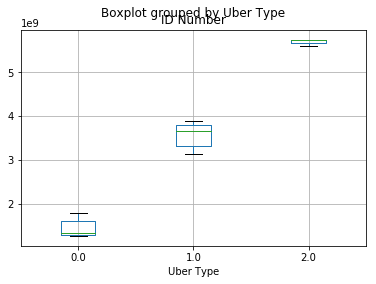

In [90]:
dfMissing.boxplot(column='ID Number', by='Uber Type')

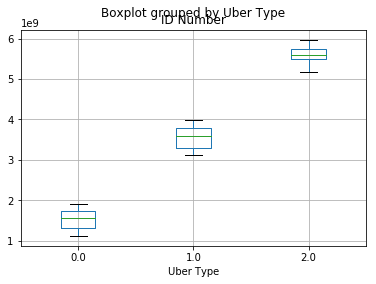

In [91]:
main1['ID Number'] = np.nan

# extract the numbers
for i in range(len(main1.index)):
    main1['ID Number'][i] = int(main1['Unnamed: 0'][i].replace('ID', ''))

# check again with boxplot
main1.boxplot(column='ID Number', by='Uber Type')

#### b. Fares


In [92]:
main1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 15 columns):
Unnamed: 0               80 non-null object
Uber Type                80 non-null float64
Origin Region            80 non-null int64
Destination Region       80 non-null int64
Origin Latitude          80 non-null float64
Origin Longitude         80 non-null float64
Destination Latitude     80 non-null float64
Destination Longitude    80 non-null float64
Journey Distance(m)      80 non-null float64
Departure Date           80 non-null object
Departure Time           80 non-null object
Travel Time(s)           80 non-null float64
Arrival Time             80 non-null object
Fare$                    60 non-null float64
ID Number                80 non-null float64
dtypes: float64(9), int64(2), object(4)
memory usage: 9.5+ KB


Build fare model for each Uber type from cleansed & missing (with no null values) datasets, calling this dataset concatmain

In [93]:
main_copy = main.drop('Detected Error', axis=1)
main1_copy = main1.drop('ID Number', axis=1)
main1_copy = main1_copy[main1_copy['Fare$'].notnull()].reset_index()

In [94]:
concatmain = pd.concat([main_copy,main1_copy], ignore_index = True, sort=False).reset_index()
concatmain = concatmain.drop(['level_0','index'], axis=1)
concatmain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 14 columns):
Unnamed: 0               384 non-null object
Uber Type                384 non-null float64
Origin Region            384 non-null int64
Destination Region       384 non-null int64
Origin Latitude          384 non-null float64
Origin Longitude         384 non-null float64
Destination Latitude     384 non-null float64
Destination Longitude    384 non-null float64
Journey Distance(m)      384 non-null float64
Departure Date           384 non-null object
Departure Time           384 non-null object
Travel Time(s)           384 non-null float64
Arrival Time             384 non-null object
Fare$                    384 non-null float64
dtypes: float64(8), int64(2), object(4)
memory usage: 42.1+ KB


In [95]:
# function to convert into date format
from datetime import datetime
def convert_str_date(date_string):
    date_date = pd.to_datetime(date_string, format='%Y-%m-%d').dt.date
    return date_date

In [96]:
# define date time function
import datetime
def date_type(date):
    weekno = datetime.datetime.weekday(date)
    if weekno<5:
        return 0
    else:
        return 1

In [97]:
# function to convert into time format
def convert_str_time(time_string):
    time_date = pd.to_datetime(time_string, format='%H:%M:%S').dt.time
    return time_date

In [98]:
# define time type function
from datetime import datetime
def time_type(time):
    mor_s = datetime.strptime('6:00:00','%H:%M:%S').time()
    mor_e = datetime.strptime('11:59:59','%H:%M:%S').time()
    noon_s = datetime.strptime('12:00:00','%H:%M:%S').time()
    noon_e = datetime.strptime('20:59:59','%H:%M:%S').time()
    if time > mor_s and time < mor_e or time == mor_s or time == mor_e:
        return 0
    elif time > noon_s and time < noon_e or time == noon_s or time == noon_e:
        return 1
    else:
        return 2

In [99]:
# apply to dataset
concatmain['Departure Date'] = convert_str_date(concatmain['Departure Date'])
concatmain['Departure Time'] = convert_str_time(concatmain['Departure Time'])

# time type is only applied to Departure time
from datetime import datetime
concatmain['Time Type'] = concatmain['Departure Time'].apply(time_type)

# apply the function to Departure date
import datetime
concatmain['Date Type'] = concatmain['Departure Date'].apply(date_type)

In [100]:
concatmain.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Time Type,Date Type
0,ID1983358249,0.0,6,4,-37.773845,144.983689,-37.809481,145.010027,7388.0,2018-03-04,23:56:11,1651.20,0:23:42,16.50,2,1
1,ID5292481643,2.0,3,5,-37.817374,144.970386,-37.802547,144.935026,4133.0,2018-06-10,02:52:41,1114.44,3:11:15,111.34,2,1
2,ID3451399222,1.0,4,6,-37.816259,145.014731,-37.773803,144.983647,11705.0,2018-07-05,16:16:21,3497.16,17:14:38,25.66,1,0
3,ID5735936789,2.0,5,4,-37.814860,144.923513,-37.812069,144.995689,7640.0,2018-07-17,21:54:03,2019.90,22:27:42,165.86,2,0
4,ID1962371446,0.0,1,4,-37.825166,144.953917,-37.813251,145.000152,5382.0,2018-06-22,17:02:08,1359.36,17:24:47,8.26,1,0


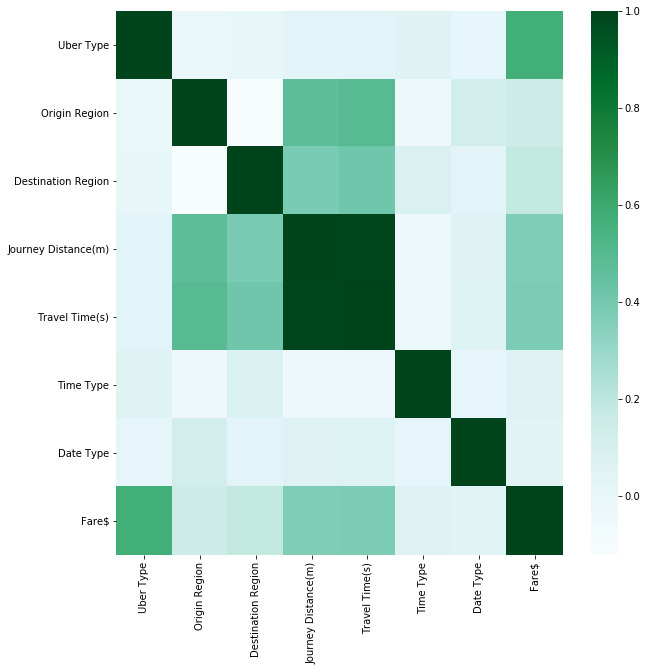

In [101]:
plt.figure(figsize=(10,10))
factor = concatmain[['Uber Type','Origin Region','Destination Region','Journey Distance(m)','Travel Time(s)','Time Type', 'Date Type', 'Fare$']]
sns.heatmap(factor.corr(),cmap='BuGn',xticklabels=factor.columns,yticklabels=factor.columns)

In [102]:
factor0 = concatmain[['Origin Region','Destination Region','Journey Distance(m)','Time Type', 'Date Type', 'Fare$']][concatmain['Uber Type']==0].reset_index().drop(['index'],axis=1)
factor1 = concatmain[['Origin Region','Destination Region','Journey Distance(m)','Time Type', 'Date Type', 'Fare$']][concatmain['Uber Type']==1].reset_index().drop(['index'],axis=1)
factor2 = concatmain[['Origin Region','Destination Region','Journey Distance(m)','Time Type', 'Date Type', 'Fare$']][concatmain['Uber Type']==2].reset_index().drop(['index'],axis=1)

- We can see that Journey Distance(m) and Travel Time(s) are highly correlated. Thus, we don't need them both as out parameters on the model. Here, I pick 'Journey distance(m)' as the parameter. Other features are Time and Date Type.
- Region codes are not relavant to the model of fares. Thus, they should not be included

In [103]:
# Uber Type = 0
df_x0 = factor0[['Journey Distance(m)','Time Type', 'Date Type']]
df_y0 = factor0['Fare$']

X_train,X_test,y_train,y_test = train_test_split(df_x0,df_y0,test_size=0.2,random_state=4)

map(pd.np.shape,[X_train, X_test, y_train, y_test])

reg0 = LinearRegression()
reg0.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [104]:
uber0_test = reg0.predict(X_test)

In [105]:
print ('r-squared for this model = ',reg0.score(X_test,y_test))

r-squared for this model =  0.9144002575632653


In [106]:
# Uber Type = 1
df_x1 = factor1[['Journey Distance(m)','Time Type', 'Date Type']]
df_y1 = factor1['Fare$']

X_train,X_test,y_train,y_test = train_test_split(df_x1,df_y1,test_size=0.2,random_state=4)

map(pd.np.shape,[X_train, X_test, y_train, y_test])

reg1 = LinearRegression()
reg1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [107]:
uber1_test = reg1.predict(X_test)

In [108]:
print ('r-squared for this model = ',reg1.score(X_test,y_test))

r-squared for this model =  0.9791538407792889


In [109]:
# Uber Type = 2
df_x2 = factor2[['Journey Distance(m)','Time Type', 'Date Type']]
df_y2 = factor2['Fare$']

X_train,X_test,y_train,y_test = train_test_split(df_x2,df_y2,test_size=0.2,random_state=4)

map(pd.np.shape,[X_train, X_test, y_train, y_test])

reg2 = LinearRegression()
reg2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [110]:
uber2_test = reg2.predict(X_test)

In [111]:
print ('r-squared for this model = ',reg2.score(X_test,y_test))

r-squared for this model =  0.9561887242950653


In [112]:
# copy misssing
df_copy = main1.copy()

# apply to dataset
df_copy['Departure Date'] = convert_str_date(df_copy['Departure Date'])
df_copy['Departure Time'] = convert_str_time(df_copy['Departure Time'])

# time type is only applied to Departure time
from datetime import datetime
df_copy['Time Type'] = df_copy['Departure Time'].apply(time_type)

# apply the function to Departure date
import datetime
df_copy['Date Type'] = df_copy['Departure Date'].apply(date_type)

In [113]:
missing0 = df_copy[(df_copy['Uber Type']==0)&(df_copy['Fare$'].isnull())]
missing0_list = list(missing0.index)

missing_X0 = missing0[['Journey Distance(m)','Time Type', 'Date Type']]
uber0_imputed = reg0.predict(missing_X0)

print(missing0_list)
print(uber0_imputed)

[40, 48, 62, 69, 70, 73, 79]
[ 8.53456157 14.72170465  6.19515474 19.38121323  7.14627721  9.52705102
 17.58256888]


In [114]:
for i in range(len(missing0_list)):
    main1['Fare$'][missing0_list[i]] = uber0_imputed[i]

In [115]:
missing1 = df_copy[(df_copy['Uber Type']==1)&(df_copy['Fare$'].isnull())]
missing1_list = list(missing1.index)

missing_X1 = missing1[['Journey Distance(m)','Time Type', 'Date Type']]
uber1_imputed = reg1.predict(missing_X1)

print(missing1_list)
print(uber1_imputed)

[45, 47, 49, 52, 54, 56, 57, 64, 71, 72, 75]
[28.54580733 56.74414473 62.05715031 47.14255733 17.64534739 54.70211062
 20.14799162 17.53038844 15.82413483 24.12947107 69.21631755]


In [116]:
for i in range(len(missing1_list)):
    main1['Fare$'][missing1_list[i]] = uber1_imputed[i]

In [117]:
missing2 = df_copy[(df_copy['Uber Type']==2)&(df_copy['Fare$'].isnull())]
missing2_list = list(missing2.index)

missing_X2 = missing2[['Journey Distance(m)','Time Type', 'Date Type']]
uber2_imputed = reg2.predict(missing_X2)

print(missing2_list)
print(uber2_imputed)

[51, 63]
[233.20998874 830.95470527]


In [118]:
for i in range(len(missing2_list)):
    main1['Fare$'][missing2_list[i]] = uber2_imputed[i]

In [119]:
outputMissing = main1.drop('ID Number', axis=1)
outputMissing.rename(columns={'Unnamed: 0':''},inplace=True)
outputMissing.to_csv('29915910.missing_value_solution.csv',index=False)

## 3. Outliers
Approach: We compare the residuals of given fares in outlier dataset with imputed fares based on our built models for each of Uber type. Those data points which are out of the residual range benchmark should be removed because they  are outliers
* Build fare model for each Uber type from cleansed & missing (with no null values) datasets, calling this dataset concatmain
* Calculate the residuals of actual fares and imputed fares of concatmain. Here, we come up with the mean and std of residual as well as IQR. From there we have residual ranges for each Uber type
* Calculate the residuals of given fares and imputed fares of routes in outlier dataset. Those data points which are out of the residual range benchmark should be removed because they  are outliers

In [120]:
main2 = outlier.copy()

In [121]:
# Uber type 0
outlier0 = main2[main2['Uber Type']==0]
outlier0.rename(columns={'Unnamed: 0':'index','Unnamed: 0.1':'Unnamed: 0'}, inplace =True)

# Uber type 1
outlier1 = main2[main2['Uber Type']==1]
outlier1.rename(columns={'Unnamed: 0':'index','Unnamed: 0.1':'Unnamed: 0'}, inplace =True)

#Uber type 2
outlier2 = main2[main2['Uber Type']==2]
outlier2.rename(columns={'Unnamed: 0':'index','Unnamed: 0.1':'Unnamed: 0'}, inplace =True)

In [122]:
uber0 = concatmain[['Uber Type','Journey Distance(m)','Time Type', 'Date Type', 'Fare$']][concatmain['Uber Type']==0].reset_index().drop(['index'],axis=1)
uber1 = concatmain[['Uber Type','Journey Distance(m)','Time Type', 'Date Type', 'Fare$']][concatmain['Uber Type']==1].reset_index().drop(['index'],axis=1)
uber2 = concatmain[['Uber Type','Journey Distance(m)','Time Type', 'Date Type', 'Fare$']][concatmain['Uber Type']==2].reset_index().drop(['index'],axis=1)

In [147]:
# The residual bounds are built on mean+-3sigma method
def residual_bound(uber_ubertype):
    ubertype = uber_ubertype['Uber Type'][0]
    
    reg = LinearRegression()
    if ubertype == 0:
        reg = reg0
    elif ubertype == 1:
        reg = reg1
    elif ubertype == 2:
        reg = reg2
        
    test_X = uber_ubertype[['Journey Distance(m)','Time Type', 'Date Type']]
    test_y = uber_ubertype['Fare$']
    test_yhat = reg.predict(test_X)

    dfTest = uber_ubertype[['Journey Distance(m)','Time Type', 'Date Type','Fare$']]
    dfTest['Imputed Fare$'] = test_yhat
    dfTest['Residual'] = dfTest['Fare$'] - dfTest['Imputed Fare$']
    
    residual_std = dfTest['Residual'].std()
    residual_mean = dfTest['Residual'].mean()
    
    print('Residual std: ', residual_std,'\nResidual mean: ', residual_mean)
    
    lower_bound = residual_mean - 3*residual_std
    upper_bound = residual_mean + 3*residual_std
    
    print('Lower Bound: ',lower_bound, '\nUpper Bound: ',upper_bound)
    
    return lower_bound, upper_bound

# the residual bounds are built on IQR method
def iqr_bound(uber_ubertype):
    ubertype = uber_ubertype['Uber Type'][0]
    
    reg = LinearRegression()
    if ubertype == 0:
        reg = reg0
    elif ubertype == 1:
        reg = reg1
    elif ubertype == 2:
        reg = reg2
        
    test_X = uber_ubertype[['Journey Distance(m)','Time Type', 'Date Type']]
    test_y = uber_ubertype['Fare$']
    test_yhat = reg.predict(test_X)

    dfTest = uber_ubertype[['Journey Distance(m)','Time Type', 'Date Type','Fare$']]
    dfTest['Imputed Fare$'] = test_yhat
    dfTest['Residual'] = dfTest['Fare$'] - dfTest['Imputed Fare$']

    q1, q3= np.percentile(dfTest['Residual'],[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
    print('Lower Bound: ',lower_bound, '\nUpper Bound: ',upper_bound)
    return(lower_bound, upper_bound)

# Calculate the imputed fares based on the model
def outlierdetect(outlier_ubertype):
    ubertype = outlier_ubertype['Uber Type'][outlier_ubertype.index[0]]
    
    reg = LinearRegression()
    if ubertype == 0:
        reg = reg0
    elif ubertype == 1:
        reg = reg1
    elif ubertype == 2:
        reg = reg2
        
    outlier_X = outlier_ubertype[['Journey Distance(m)','Time Type', 'Date Type']]
    outlier_y = outlier_ubertype['Fare$']
    outlier_yhat = reg.predict(outlier_X)
    
    dfOutlier = outlier_ubertype[['Journey Distance(m)','Time Type', 'Date Type','Fare$']]
    dfOutlier['Imputed Fare$'] = outlier_yhat
    dfOutlier['Residual'] = dfOutlier['Fare$'] - dfOutlier['Imputed Fare$']
            
    return dfOutlier

* Residual benchmark based on sigma method
* 11 outliers are detected using this method

In [148]:
tuple_bound = residual_bound(uber0)
dfOutlier = outlierdetect(outlier0)
detected0 = pd.DataFrame(dfOutlier[(dfOutlier['Residual']<tuple_bound[0])|(dfOutlier['Residual']>tuple_bound[1])])

Residual std:  1.9663317875124935 
Residual mean:  -0.057265801420314254
Lower Bound:  -5.9562611639577945 
Upper Bound:  5.841729561117166


In [149]:
tuple_bound = residual_bound(uber1)
dfOutlier = outlierdetect(outlier1)
detected1 = pd.DataFrame(dfOutlier[(dfOutlier['Residual']<tuple_bound[0])|(dfOutlier['Residual']>tuple_bound[1])])

Residual std:  2.401153987441089 
Residual mean:  0.12525643795926508
Lower Bound:  -7.0782055243640025 
Upper Bound:  7.328718400282532


In [150]:
tuple_bound = residual_bound(uber2)
dfOutlier = outlierdetect(outlier2)
detected2 = pd.DataFrame(dfOutlier[(dfOutlier['Residual']<tuple_bound[0])|(dfOutlier['Residual']>tuple_bound[1])])

Residual std:  27.84203736344357 
Residual mean:  3.222072408347926
Lower Bound:  -80.30403968198279 
Upper Bound:  86.74818449867864


In [151]:
detected_std = detected0.copy()
detected_std = pd.concat([detected_std,detected1])
detected_std = pd.concat([detected_std,detected2])
print(detected_std)

detected_std_index = list(detected_std.index)
print(detected_std_index)

     Journey Distance(m)  Time Type  Date Type   Fare$  Imputed Fare$  \
10                6919.0          2          0   7.435      14.510897   
27                3241.0          2          1   9.440      15.990628   
43               11529.0          2          0   9.280      15.944265   
79               50797.0          1          0  13.060      24.132797   
113              16033.0          2          1  12.910      19.967993   
118              44450.0          1          0  11.825      22.159350   
119              13169.0          2          1  11.545      19.077501   
61                5193.0          0          1   6.915      16.342158   
97                6954.0          1          1   9.355      24.236441   
115               6508.0          2          0  10.900      24.786352   
71                6434.0          2          0  65.270     146.914242   

      Residual  
10   -7.075897  
27   -6.550628  
43   -6.664265  
79  -11.072797  
113  -7.057993  
118 -10.334350  
119 

Residual benchmarks are based on IQR method
27 outliers are detected using this method. IQR is more aggressive comared to the earlier one

In [170]:
tuple_boundi = iqr_bound(uber0)
dfOutlieri = outlierdetect(outlier0)
detected0i = pd.DataFrame(dfOutlieri[(dfOutlieri['Residual']<tuple_boundi[0])|(dfOutlieri['Residual']>tuple_boundi[1])])
print(detected0i)

Lower Bound:  -4.44108835907163 
Upper Bound:  3.9463739124153374
     Journey Distance(m)  Time Type  Date Type   Fare$  Imputed Fare$  \
10                6919.0          2          0   7.435      14.510897   
12                5042.0          2          1  21.310      16.550606   
22               10145.0          1          0   6.760      11.493036   
27                3241.0          2          1   9.440      15.990628   
43               11529.0          2          0   9.280      15.944265   
57                8502.0          2          1  21.850      17.626409   
77                9559.0          1          0   6.305      11.310833   
79               50797.0          1          0  13.060      24.132797   
83                7628.0          2          1  21.740      17.354660   
95                4899.0          2          1  20.890      16.506143   
102              16033.0          2          0  21.640      17.344676   
109               6102.0          2          1  21.020    

In [171]:
tuple_boundi = iqr_bound(uber1)
dfOutlieri = outlierdetect(outlier1)
detected1i = pd.DataFrame(dfOutlieri[(dfOutlieri['Residual']<tuple_boundi[0])|(dfOutlieri['Residual']>tuple_boundi[1])])
print(detected1i)

Lower Bound:  -4.864814040687456 
Upper Bound:  5.445732008162297
     Journey Distance(m)  Time Type  Date Type   Fare$  Imputed Fare$  \
14                4057.0          2          1  21.960      27.677968   
24                2874.0          2          1  21.620      26.547094   
29               47186.0          1          1  56.000      62.695717   
58                4177.0          0          0   4.590      10.136307   
61                5193.0          0          1   6.915      16.342158   
90               45417.0          2          1  61.670      67.215540   
93                3621.0          0          0   4.355       9.604806   
97                6954.0          1          1   9.355      24.236441   
99               47581.0          0          1  50.620      56.862435   
105               5518.0          0          0   5.315      11.418219   
112              45846.0          2          1  60.870      67.625638   
115               6508.0          2          0  10.900    

In [172]:
tuple_boundi = iqr_bound(uber2)
dfOutlieri = outlierdetect(outlier2)
detected2i = pd.DataFrame(dfOutlieri[(dfOutlieri['Residual']<tuple_boundi[0])|(dfOutlieri['Residual']>tuple_boundi[1])])
print(detected2i)

Lower Bound:  -81.90882768729305 
Upper Bound:  94.7460391604547
Empty DataFrame
Columns: [Journey Distance(m), Time Type, Date Type, Fare$, Imputed Fare$, Residual]
Index: []


In [169]:
dfOutlieri

,Journey Distance(m),Time Type,Date Type,Fare$,Imputed Fare$,Residual
3,50797.0,0,0,911.98,881.153369,30.826631
9,2616.0,1,1,74.50,87.476442,-12.976442
15,11588.0,1,0,282.05,232.465866,49.584134
38,46499.0,2,1,805.88,812.804105,-6.924105
42,11071.0,0,0,262.12,224.241434,37.878566
46,8361.0,0,1,186.83,182.800883,4.029117
52,47033.0,1,0,795.76,818.586883,-22.826883
64,43797.0,2,1,755.55,768.123642,-12.573642
71,6434.0,2,0,65.27,146.914242,-81.644242
72,8573.0,2,0,193.85,182.284896,11.565104


In [173]:
detected_iqr = detected0i.copy()
detected_iqr = pd.concat([detected_iqr,detected1i])
detected_iqr = pd.concat([detected_iqr,detected2i])
print(detected_iqr)

detected_iqr_index = list(detected_iqr.index)
print(detected_iqr_index)

     Journey Distance(m)  Time Type  Date Type   Fare$  Imputed Fare$  \
10                6919.0          2          0   7.435      14.510897   
12                5042.0          2          1  21.310      16.550606   
22               10145.0          1          0   6.760      11.493036   
27                3241.0          2          1   9.440      15.990628   
43               11529.0          2          0   9.280      15.944265   
57                8502.0          2          1  21.850      17.626409   
77                9559.0          1          0   6.305      11.310833   
79               50797.0          1          0  13.060      24.132797   
83                7628.0          2          1  21.740      17.354660   
95                4899.0          2          1  20.890      16.506143   
102              16033.0          2          0  21.640      17.344676   
109               6102.0          2          1  21.020      16.880187   
113              16033.0          2          1  12.

In [156]:
outlier_output = outlier.copy()
outlier_output.drop([10, 27, 43, 79, 113, 118, 119, 61, 97, 115, 71], axis=0, inplace=True)

In [157]:
outlier_output.drop('Unnamed: 0', axis=1, inplace=True)

In [158]:
outlier_output.rename(columns={'Unnamed: 0.1':'Unnamed: 0'}, inplace=True)

In [159]:
outlier_output.to_csv('29915910_outliers_solution.csv')

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID1993564985,0,8,4,-37.815834,145.046450,-37.800567,145.004459,4863.0,2018-05-05,10:55:15,1532.64,11:20:47,10.24
1,ID1172116286,0,9,5,-38.110916,144.654173,-37.791485,144.936760,44867.0,2018-02-09,21:36:33,10742.94,0:35:35,26.56
2,ID3217020985,1,4,8,-37.812249,145.000340,-37.815834,145.046450,4232.0,2018-06-09,22:20:46,1374.54,22:43:40,25.01
3,ID5963205600,2,7,9,-37.861835,144.905716,-38.110916,144.654173,50797.0,2018-01-18,08:59:46,13173.36,12:39:19,911.98
4,ID3394747801,1,5,8,-37.804705,144.927916,-37.807202,145.026637,9443.0,2018-01-21,13:29:30,2394.06,14:09:24,25.22
